# Accessing and creating content

In this page, we are going to observe how the following can be accomplished:
 * [Searching for content](#searching-for-content)
  * [Wild card search](#wild-card-search)
  * [Searching for content outside your organization](#searching-for-content-outside-your-org)
 * [Creating new content](#creating-new-content)
  * [Publishing an item as a web layer](#publishing-an-item-as-a-web-layer)
  * [Importing data from a pandas dataframe](#importing-data-from-a-pandas-data-frame)
 * [Routing analysis](#Routing-Analysis)
 * [Using folders to organize your content](#using-folders-to-organize-your-content)

<a id="searching-for-content"></a>
## Searching for content

The first step is to import the API and connect to your GIS

In [1]:
%pylab inline
from arcgis.gis import GIS

Populating the interactive namespace from numpy and matplotlib


In [2]:
#we're connecting to ArcGIS Online as an anonymous user:
gis=GIS()

In [3]:
gis.content
#Users call methods on this 'content' object to manipulate (create, get, search,etc) items.
# we never use the create property

In [4]:
search_result = gis.content.search(query="title:避難")

In [5]:
search_result

[<Item title:"避難施設データ/Evacuation_Shelter" type:Feature Layer Collection owner:Esri_Japan>,
 <Item title:"(4)災害対応:避難所(Evacuation Sites)" type:Web Map owner:EMT2011>,
 <Item title:"避難所管理・開設時のサポート" type:Web Map owner:EJgove>,
 <Item title:"避難施設レイヤ" type:Feature Layer Collection owner:EJgove>,
 <Item title:"K186_L2_0.5h_避難所安全度" type:Web Map owner:g17tc004>,
 <Item title:"デモ避難所Test_nawa" type:Code Attachment owner:EJgove>,
 <Item title:"市区町村別避難者数/避難者割合 (北海道, 第26報, 9/12 20:00)" type:Feature Layer Collection owner:NIED_CRS@bosai>,
 <Item title:"G-mottyとG空間情報センターとの連携テスト（G空間情報センターが公開する指定避難場所データ）" type:Web Map owner:kaogja8060_kitakyushu>,
 <Item title:"糸島市指定避難所(20150228作成)_151228" type:Map Image Layer owner:kyushu_u>,
 <Item title:"県別避難者数・避難所数（総務省消防庁被害状況_第11報）" type:Code Attachment owner:NIED_CRS@bosai>]

The `search()` method returned us a list of `Item` objects that matched the search criteria. The `query` parameter supports a variety of inputs, refer the [**search reference**](http://resources.arcgis.com/en/help/arcgis-rest-api/#/Search_reference/02r3000000mn000000/) for more ideas on what is supported. Some typical examples are shown below:

In [6]:
# search and list all feature layers in my contents
search_result = gis.content.search(query="", item_type="Feature Layer",sort_field="numViews",
                                   sort_order="asc", max_items = 12)

[<Item title:"Chord Diagram 1" type:Feature Layer Collection owner:helent_biz>,
 <Item title:"Harjoitus_fieldworker" type:Feature Layer Collection owner:hirvoha>,
 <Item title:"ArcMap ve ArcGIS Pro Arasındaki Temel Farklar Çalıştay Anketi_fieldworker" type:Feature Layer Collection owner:kkumru>,
 <Item title:"Lambeth_HH_Proj" type:Feature Layer Collection owner:GrahamGeowise>,
 <Item title:"Tai_Kok_Tsui_Land_Use_1493201781559" type:Feature Layer Collection owner:s1201042@smcesps.edu.hk>,
 <Item title:"Lekplatsen_fieldworker" type:Feature Layer Collection owner:cdh1965_agyskolan>,
 <Item title:"d7a11947-0e59-4041-a441-34f42e1f19f8" type:Feature Layer Collection owner:LocationOne>,
 <Item title:"Richmond_upon_Thames_Pop_Proj_GLA_5YR_Persons_Rate" type:Feature Layer Collection owner:GrahamGeowise>,
 <Item title:"King County Regional GIS HUB_fieldworker" type:Feature Layer Collection owner:TJA_Community>,
 <Item title:"E_STORY_MAP_SGC2015_CD_I_PR_BF" type:Feature Layer Collection owner:sgc

In [ ]:
search_result[1]

<a id="wild-card-search"></a>
### Wild card search
Search supports usage of wild cards. You can use one asterisk `*` for multiple character wild card search and one question mark `?` for single character.

In [ ]:
# search for content that begin with a prefix - say 'USA'
search_result_USA = gis.content.search(query="title:USA*")
search_result_USA

In [ ]:
from IPython.display import display
for item in search_result_USA[2:5]:
    display(item)

Once you know an item's id (called `itemId`), you can access it using the `get()` method instead of searching for it.

In [ ]:
# lets get the itemid of first item from previous query
first_item = search_result_USA[0]
known_item_id = first_item.id
print(known_item_id)

In [ ]:
# lets use the get() to access this item
online_banking_item = gis.content.get(known_item_id)
online_banking_item

<a id="searching-for-content-outside-your-org"></a>
### Searching for content outside your organization
So far, we were able to search for content that belonged to other named users but shared across the organization. When connected to ArcGIS Online, you can also search for content published by other named users and shared publicly. You can do so by turning the **`outside_org`** flag to `True`.

In [7]:
#kuaile180603
import getpass
developersUser = 'xiaoya_gis'
developersPass =getpass.getpass(prompt='password pls')
gis2 = GIS("https://www.arcgis.com",develoersUser,develoersPass)

password pls········


In [31]:
user = gis2.users.get(developersUser)
user

<User username:xiaoya_gis>

Let us search for public web scenes visualizing 3D cities. Note, I want to see content that is most popular by number of views to be returned on the top. I am also concerned that if too many items show up, the query might be running slow, hence restrict the results to 5 items.

In [ ]:
public_3d_city_scenes = gis2.content.search(query="3d cities", item_type = "web scene",
                                           sort_field="numViews" ,sort_order="asc",
                                           max_items = 5, outside_org=True)
for item in public_3d_city_scenes:
    display(item)

### Deleting content
You can delete any item using the delete() method of the Item object. When deleting a hosted layer, this operation also deletes the hosted services powering the item.

In [ ]:
search_result = gis2.content.search(query="")
search_result

In [ ]:
for i in search_result:
    i.delete()

So far, you observed how existing items can be searched and accessed using the `gis` module. Next, let us observe how new content can be created.

<a id="creating-new-content"></a>
## Creating new content

To create new items on your GIS, you use the `add()` method on `ContentManager` object. As earlier, you would not create this object, instead access it from the `content` property of your `GIS` object.

The `add()` method accepts a dictionary containing the properties of the item to be created. The optional `data` parameter accepts a string path to a file. 
All content you add this way is added to the authenticated user's contents. 
Let us add a csv file and publish it as a feature layer.

In [8]:
#https://www.geospatial.jp/ckan/dataset
#https://www.geospatial.jp/ckan/dataset/d6a87e42-6e86-449e-9d76-1e40319bb99b/resource/b5d633c8-f2c8-4baa-88a9-fcf1872dcfcd
csv_file = 'https://www.geospatial.jp/ckan/dataset/d6a87e42-6e86-449e-9d76-1e40319bb99b/resource/b5d633c8-f2c8-4baa-88a9-fcf1872dcfcd/download/724522014tochiginodamsyogen04033.csv'
csv_properties={'title':'栃木のダム諸元表',
                'description':'blahblahlalala',
                'tags':'arcgis, python, dam'}
thumbnail_path = r"Kerr-dam-1_resize_md.jpg"
csv_item = gis2.content.add(item_properties=csv_properties, data=csv_file,
                                     thumbnail = thumbnail_path)

The `add()` method returns an object of type `arcgis.gis.Item` representing the added item. In Jupyter notebook environment, you can visualize it by querying the item

<Item title:"栃木のダム諸元表" type:CSV owner:xiaoya_gis>
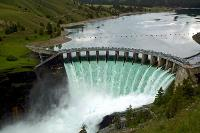

In [9]:
display(csv_item)

<a id="publishing-an-item-as-a-web-layer"></a>
### Publishing an item as a web layer
 Items such as csv can be published into hosted web layers. This is accomplished by calling the `publish()` method on that `Item` object.

The `publish()` method accepts an optional `publish_parameters` dictionary where you can specify certain parameters. However it is also optional.

<Item title:"栃木のダム諸元表" type:Feature Layer Collection owner:xiaoya_gis>
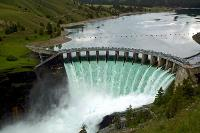

In [10]:
csv_lyr = csv_item.publish({'name':'栃木のダム','locationType':'coordinates', 'latitudeFieldName':'緯度', 'longitudeFieldName':'経度'})
display(csv_lyr)

<a id="importing-data-from-a-pandas-data-frame"></a>
### Importing data from a pandas data frame

Using the Python API, you can import such Pandas data frames using the `import_data()` method. You can then add that feature collection as an item to your GIS.

 we could publish the csv as an item as shown earlier, but we will try to modify data through pandas and add it as a feature collection instead.

In [11]:
# read excel as a pandas dataframe
import pandas as pd
from arcgis.geocoding import geocode
file=pd.read_excel('https://www.geospatial.jp/ckan/dataset/e8e894e0-a18b-46cd-96e8-ad97ca976a15/resource/a0669bcd-063c-4074-8f8a-e4459227961e/download/2.xlsx')

In [12]:
file.head()

,名称,所在地,緯度（10進法）,緯度（60進法）,経度（10進法）,経度（60進法）
0,調布基地跡地運動広場及び大沢総合グラウンド一部,調布市西町,35.668392,"35゜40'06.21""",139.526484,"139゜31'35.34"""
1,都立神代植物公園周辺及び自由広場,調布市深大寺元町5-31-10,35.670815,"35゜40'14.93""",139.549247,"139゜32'57.29"""
2,多摩川河川敷（第１区）周辺（府中市境～多摩川原橋）,調布市多摩川2-7,35.645660,"35゜38'44.38""",139.525410,"139゜31'31.48"""
3,多摩川河川敷（第２区）周辺（多摩川原橋～二ヶ領堰）,調布市多摩川5-32,35.640837,"35゜38'27.01""",139.537489,"139゜32'14.96"""
4,多摩川河川敷（第３区）周辺（二ヶ領堰～狛江市境）,調布市染地2-51,35.636687,"35゜38'12.07""",139.553918,"139゜33'14.10"""


In [13]:
#river_site=file[file['名称'].str.contains('多摩川')] # some preporcessing 
river_site=file

In [14]:
river_site.head()

,名称,所在地,緯度（10進法）,緯度（60進法）,経度（10進法）,経度（60進法）
0,調布基地跡地運動広場及び大沢総合グラウンド一部,調布市西町,35.668392,"35゜40'06.21""",139.526484,"139゜31'35.34"""
1,都立神代植物公園周辺及び自由広場,調布市深大寺元町5-31-10,35.670815,"35゜40'14.93""",139.549247,"139゜32'57.29"""
2,多摩川河川敷（第１区）周辺（府中市境～多摩川原橋）,調布市多摩川2-7,35.645660,"35゜38'44.38""",139.525410,"139゜31'31.48"""
3,多摩川河川敷（第２区）周辺（多摩川原橋～二ヶ領堰）,調布市多摩川5-32,35.640837,"35゜38'27.01""",139.537489,"139゜32'14.96"""
4,多摩川河川敷（第３区）周辺（二ヶ領堰～狛江市境）,調布市染地2-51,35.636687,"35゜38'12.07""",139.553918,"139゜33'14.10"""


Now that we have the desired data frame, let us import that as a feature collection

In [15]:
river_f = gis2.content.import_data(river_site,address_fields={"Address":"所在地"})
river_f

<FeatureCollection>

Next step is to convert the feature collection to a JSON and add it as a text based item to the GIS

In [16]:
import json
river_dict = dict(river_f.properties)

In [17]:
#edu_fc.properties
river_json=json.dumps({"featureCollection": {"layers": [river_dict]}})

In [18]:
river_item_properties = {'title': '広域避難場所',
                        'description':'Example demonstrating conversion of pandas ' ,
                        'tags': 'arcgis python api, pandas',
                        'text':river_json,
                        'type':'Feature Collection'}
river_item = gis2.content.add(river_item_properties)

In [19]:
river_feature_layer_item=river_item.publish({'name':'広域避難場所','locationType':'address','addressTemplate':'所在地'})

In [20]:
river_feature_layer_item

<Item title:"広域避難場所" type:Feature Layer Collection owner:xiaoya_gis>

<a id="Routing-Analysis"></a>
### Routing Analysis

In this part, we perform a **routing** analysis to figure out the best path to route emergency supplies from storage to the relief camps

In [33]:
#kuaile180603
import getpass
developersUser = 'xiaoya_gis'
developersPass =getpass.getpass(prompt='password pls')
gis2 = GIS("https://www.arcgis.com",develoersUser,develoersPass)

password pls········


In [34]:
routemap = gis2.map("東京都",12)
routemap.add_layer(river_feature_layer_item)
route_data = river_feature_layer_item.layers[0].query().sdf
route_data.head()

,ObjectId,SHAPE,名称,所在地,経度_10進法_,経度_60進法_,緯度_10進法_,緯度_60進法_
0,1,"{""x"": 15532241.549099997, ""y"": 4254733.4540999...",調布基地跡地運動広場及び大沢総合グラウンド一部,調布市西町,139.526484,"139゜31'35.34""",35.668392,"35゜40'06.21"""
1,2,"{""x"": 15534188.549000002, ""y"": 4255601.4781000...",都立神代植物公園周辺及び自由広場,調布市深大寺元町5-31-10,139.549247,"139゜32'57.29""",35.670815,"35゜40'14.93"""
2,3,"{""x"": 15531896.759000003, ""y"": 4252089.6631999...",多摩川河川敷（第１区）周辺（府中市境～多摩川原橋）,調布市多摩川2-7,139.525410,"139゜31'31.48""",35.645660,"35゜38'44.38"""
3,4,"{""x"": 15533258.808700005, ""y"": 4251521.3188000...",多摩川河川敷（第２区）周辺（多摩川原橋～二ヶ領堰）,調布市多摩川5-32,139.537489,"139゜32'14.96""",35.640837,"35゜38'27.01"""
4,5,"{""x"": 15534953.480899995, ""y"": 4250909.8575000...",多摩川河川敷（第３区）周辺（二ヶ領堰～狛江市境）,調布市染地2-51,139.553918,"139゜33'14.10""",35.636687,"35゜38'12.07"""


In [40]:
route_data.shape

(10, 8)

In [35]:
routemap

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)

In [36]:
we = geocode('東京都狛江市和泉本町４-11-1')[0] #Jikei University 3rd Hospital東京慈恵会医科大学附属第三病院
routemap.draw(we, {"title": "hispital", "content": "some Center"})

In [37]:
from arcgis import features
import datetime

In [38]:
features.use_proximity.plan_routes?

In [39]:
start_time = datetime.datetime(2018, 12, 13, 9, 0)
routes = features.use_proximity.plan_routes(
    river_feature_layer_item, 
    2, 
    5, 
    start_time, 
    we, 
    stop_service_time=20)
routemap.add_layer(routes['routes_layer'])
routemap.add_layer(routes['assigned_stops_layer'])

The following restriction attributes are not valid and were ignored: "Avoid Carpool Roads, Avoid Express Lanes, Avoid Gates, Roads Under Construction Prohibited, Through Traffic Prohibited, Avoid Private Roads, Avoid Unpaved Roads".
The attribute name, "Any Hazmat Prohibited", used with parameter name, "Restriction Usage", is not valid and was ignored.
The attribute name, "Avoid Carpool Roads", used with parameter name, "Restriction Usage", is not valid and was ignored.
The attribute name, "Avoid Express Lanes", used with parameter name, "Restriction Usage", is not valid and was ignored.
The attribute name, "Avoid Gates", used with parameter name, "Restriction Usage", is not valid and was ignored.
The attribute name, "Avoid Private Roads", used with parameter name, "Restriction Usage", is not valid and was ignored.
The attribute name, "Avoid Roads Unsuitable for Pedestrians", used with parameter name, "Restriction Usage", is not valid and was ignored.
The attribute name, "Avoid Stairwa

<a id="using-folders-to-organize-your-content"></a>
### Using folders to organize your content
Over time, your GIS can get filled with content. You can create folders on your GIS, just like in your file system, and use it to organize.
The `create_folder()` and `delete_folder()` methods available on the `ContentManager` class can be used to manage your folders. Once created, you can use the `move()` method to move content into and out of folders.

Let us create a folder called 'ports' and move the `ports_item` into it 

In [ ]:
# create new folder
gis.content.create_folder(folder= 'travel_plan')

In [ ]:
# move  into this folder
river_feature_layer_item.move(folder= 'travel_plan')

You can move content out of folders to root by calling the `move()` method and specifying `/` as folder name

In [ ]:
# move back to root
river_feature_layer_item.move(folder='/')